In [1]:
import numpy as np
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline

In [2]:
df_base = pd.read_csv('data/food-facts/data.featureEngineering.tsv', sep='\t', dtype={'code':str})

In [3]:
df_base.shape

(170233, 9)

In [4]:
df_base.head()

,code,created_datetime,product_name,brands,ingredients_text,sugars_100g,salt_100g,sodium_100g,organic
0,4559,03/09/2017,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,0.63500,0.250,0
1,16087,03/09/2017,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",3.57,1.22428,0.482,1
2,16094,03/09/2017,Organic Polenta,Bob's Red Mill,Organic polenta,0.00,0.00000,0.000,1
3,16100,03/09/2017,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",11.54,0.00000,0.000,0
4,16117,03/09/2017,Organic Long Grain White Rice,Lundberg,Organic long grain white rice,0.00,0.00000,0.000,1


In [5]:
grp_organic = df_base.groupby('organic')

In [6]:
df_grp_organic = pd.DataFrame({'organic_count' : grp_organic.size()})

In [36]:
#df_grp_organic.index = ['Non-organic','organic']

In [7]:
df_grp_organic['organic_portion'] = df_grp_organic['organic_count'] / df_base.shape[0]

In [8]:
df_grp_organic['total_sugar'] = df_base.pivot_table('sugars_100g', columns='organic', aggfunc=sum).T

In [9]:
df_grp_organic['total_sugar_portion'] = df_grp_organic['total_sugar'] / df_grp_organic['total_sugar'].sum()

In [10]:
df_grp_organic['total_salt'] = df_base.pivot_table('salt_100g', columns='organic', aggfunc=sum).T

In [11]:
df_grp_organic['total_salt_portion'] = df_grp_organic['total_salt'] / df_grp_organic['total_salt'].sum()

In [12]:
df_grp_organic.index = ['Non-organic','organic']

In [13]:
df_grp_organic

,organic_count,organic_portion,total_sugar,total_sugar_portion,total_salt,total_salt_portion
Non-organic,161234,0.947137,2574143.986,0.959145,362371.076512,0.98335
organic,8999,0.052863,109646.387,0.040855,6135.461875,0.01665


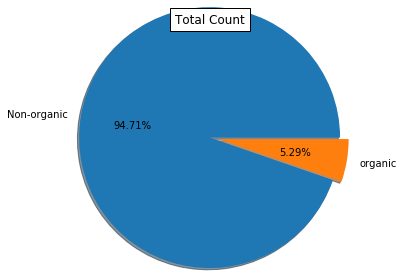

In [209]:
import matplotlib.pyplot as plt
%matplotlib inline
#xpos = np.arange(len(df_grp_organic.index))
#plt.bar(df_grp_organic.index, df_grp_organic.organic_count, label="Product Count")
plt.title("Total Count", bbox={'facecolor':'2', 'pad':5})
plt.axis("equal")

plt.pie(df_grp_organic.organic_count, labels=df_grp_organic.index, shadow=True, autopct='%1.2f%%',radius=1.5,explode=[0,0.1])
plt.show()

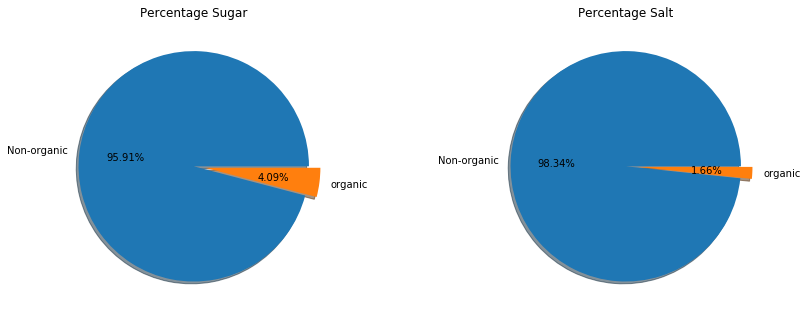

In [47]:
fig = plt.figure()

ax_sugar = fig.add_axes([0,0,1,1], aspect=1)
ax_sugar.pie(df_grp_organic.total_sugar_portion, labels=df_grp_organic.index, \
                   shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_sugar.set_title('Percentage Sugar')


ax_salt = fig.add_axes([1,0,1,1], aspect=1)
ax_salt.pie(df_grp_organic.total_salt_portion, labels=df_grp_organic.index, \
                   shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_salt.set_title('Percentage Salt')
plt.show()

In [48]:
df_base['brands'].value_counts().shape

(23977,)

In [155]:
df_base.head()

,code,created_datetime,product_name,brands,ingredients_text,sugars_100g,salt_100g,sodium_100g,organic
0,4559,03/09/2017,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,0.63500,0.250,0
1,16087,03/09/2017,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",3.57,1.22428,0.482,1
2,16094,03/09/2017,Organic Polenta,Bob's Red Mill,Organic polenta,0.00,0.00000,0.000,1
3,16100,03/09/2017,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",11.54,0.00000,0.000,0
4,16117,03/09/2017,Organic Long Grain White Rice,Lundberg,Organic long grain white rice,0.00,0.00000,0.000,1


In [166]:
df_base.shape

(170233, 9)

In [169]:
mask_brand = df_base['brands'].value_counts()[0:100].index

In [170]:
mask_brand

Index(['Meijer', 'Kroger', 'Great Value', 'Ahold', 'Spartan', 'Roundy's',
       'Weis', 'Food Lion', 'Shoprite', 'Harris Teeter', 'Giant Eagle',
       'Hy Vee', 'Food Club', 'Hannaford', 'Target Stores',
       'Whole Foods Market', '365 Everyday Value', 'Wegmans',
       'Essential Everyday', 'Market Pantry', 'Goya', 'Schnucks',
       'Weis Quality', 'Giant', 'Trader Joe's', 'Tops', 'Fresh & Easy',
       'Big Y', 'Winn Dixie', 'Clover Valley', 'Brookshire's', 'Key Food',
       'Wal Mart Stores', 'Mccormick', 'Raley's', 'Nice', 'Western Family',
       'Valu Time', 'Hormel', 'Signature Kitchens', 'Southern Home',
       'Gold Emblem', 'Lowes Foods', 'Shurfine', 'Wilton', 'Private Selection',
       'Dannon', 'Wild Harvest', 'Archer Farms', 'Safeway', 'Simply Balanced',
       'Winco Foods', 'H E B', 'Galerie', 'Family Gourmet', 'Full Circle',
       'Welch's', 'Del Monte', 'Bob's Red Mill', 'Daily Chef',
       'Russell Stover', 'The Hain Celestial Group', 'Blue Bunny', 'Amy's',
 

In [171]:
df_100brands = df_base[(df_base['brands'].isin(mask_brand))]

In [172]:
df_100brands.shape

(48719, 9)

In [215]:
df_100brands.head()

,code,created_datetime,product_name,brands,ingredients_text,sugars_100g,salt_100g,sodium_100g,organic
2,16094,03/09/2017,Organic Polenta,Bob's Red Mill,Organic polenta,0.00,0.00000,0.000,1
63,33060,03/09/2017,10-Grain Pancake Mix,Bob's Red Mill,"Wheat, rye, triticale, oat, corn, barley, soy ...",5.17,2.75844,1.086,0
76,34425,03/09/2017,"Foods, Spanish Peanuts",Kettle,"Spanish peanuts, expeller pressed high monouns...",3.57,1.13284,0.446,0
77,34432,03/09/2017,"Foods, Honey Roasted Nut Mix",Kettle,"Peanuts, almonds, cashews, pecans, sucrose, ho...",3.57,1.08966,0.429,0
79,34456,03/09/2017,"Foods, Deluxe Nut Mix",Kettle,"Cashews, almonds, hazelnuts, pecans, brazil nu...",3.57,0.58928,0.232,0


In [269]:
grp_brand_sugar = df_100brands['sugars_100g'].groupby([df_100brands['brands'],df_100brands['organic']]).count()

In [270]:
grp_brand_sugar.head()

brands              organic
365 Everyday Value  0           616
                    1           297
Ahold               0          1285
                    1            92
Aldi Bennerpany     0           173
Name: sugars_100g, dtype: int64

In [271]:
df_brand = grp_brand_sugar.unstack()

In [272]:
df_brand.columns = ['Non-organic-count','Organic-count']

In [273]:
df_brand.head()

,Non-organic-count,Organic-count
brands,,
365 Everyday Value,616.0,297.0
Ahold,1285.0,92.0
Aldi Bennerpany,173.0,9.0
Amy's,192.0,49.0
Archer Farms,309.0,3.0


In [274]:
# Change type to int
df_brand['Non-organic-count'] = df_brand['Non-organic-count'].astype(int)
df_brand['Organic-count'] = df_brand['Organic-count'].fillna(0).astype(int)

In [275]:
# sort by Organic count
df_brand.sort_values("Organic-count", inplace=True, ascending=False )
df_brand.head()

,Non-organic-count,Organic-count
brands,,
365 Everyday Value,616,297
Wild Harvest,114,198
O Organics,48,153
Meijer,2646,151
Simply Balanced,142,149


In [276]:
df_brand['Non-Org_pcnt'] = df_brand['Non-organic-count'] / df_brand.sum(axis=1)
df_brand['Organic_pcnt'] = df_brand['Organic-count'] / df_brand.sum(axis=1)
df_brand.head()

,Non-organic-count,Organic-count,Non-Org_pcnt,Organic_pcnt
brands,,,,
365 Everyday Value,616,297,0.674699,0.325061
Wild Harvest,114,198,0.365385,0.633873
O Organics,48,153,0.238806,0.760291
Meijer,2646,151,0.946014,0.053968
Simply Balanced,142,149,0.487973,0.511170


In [277]:
# make dataframe over 5% organic
df_brand_org5 = df_brand[df_brand['Organic_pcnt'] > 0.05]
print(df_brand_org5.shape)
df_brand_org5.head()

(23, 4)


,Non-organic-count,Organic-count,Non-Org_pcnt,Organic_pcnt
brands,,,,
365 Everyday Value,616,297,0.674699,0.325061
Wild Harvest,114,198,0.365385,0.633873
O Organics,48,153,0.238806,0.760291
Meijer,2646,151,0.946014,0.053968
Simply Balanced,142,149,0.487973,0.511170


In [278]:
#df_brand_org5.describe()
df_brand_org5[['Non-organic-count', 'Organic-count']].sum()

Non-organic-count    10618
Organic-count         2013
dtype: int64

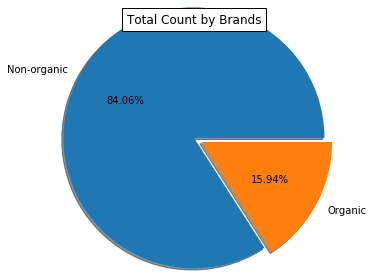

In [279]:
plt.title("Total Count by Brands", bbox={'facecolor':'2', 'pad':5})
plt.axis("equal")

plt.pie(df_brand_org5[['Non-organic-count', 'Organic-count']].sum(), labels=['Non-organic','Organic'],\
        shadow=True, autopct='%1.2f%%',radius=1.5,explode=[0,0.1])
plt.show()

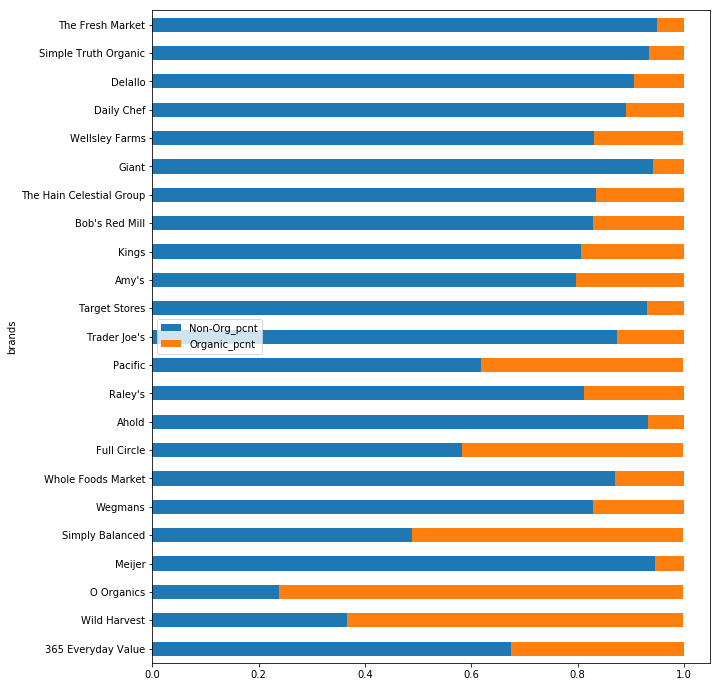

In [280]:
ax_brand_org5 = df_brand_org5[['Non-Org_pcnt','Organic_pcnt']]\
    .plot(kind="barh", alpha=1, label="Brands", figsize=(10,12), stacked=True)

In [281]:
df_brand_org5.head()

,Non-organic-count,Organic-count,Non-Org_pcnt,Organic_pcnt
brands,,,,
365 Everyday Value,616,297,0.674699,0.325061
Wild Harvest,114,198,0.365385,0.633873
O Organics,48,153,0.238806,0.760291
Meijer,2646,151,0.946014,0.053968
Simply Balanced,142,149,0.487973,0.511170


In [282]:
df_base.head()

,code,created_datetime,product_name,brands,ingredients_text,sugars_100g,salt_100g,sodium_100g,organic
0,4559,03/09/2017,Peanuts,Torn & Glasser,"Peanuts, wheat flour, sugar, rice flour, tapio...",17.86,0.63500,0.250,0
1,16087,03/09/2017,Organic Salted Nut Mix,Grizzlies,"Organic hazelnuts, organic cashews, organic wa...",3.57,1.22428,0.482,1
2,16094,03/09/2017,Organic Polenta,Bob's Red Mill,Organic polenta,0.00,0.00000,0.000,1
3,16100,03/09/2017,Breadshop Honey Gone Nuts Granola,Unfi,"Rolled oats, grape concentrate, expeller press...",11.54,0.00000,0.000,0
4,16117,03/09/2017,Organic Long Grain White Rice,Lundberg,Organic long grain white rice,0.00,0.00000,0.000,1


In [283]:
#df_bands_sugar = df_100brands.pivot_table('sugars_100g', index="organic", columns='brands', aggfunc=sum).T
df_bands_sugar = df_base[(df_base['brands'].isin(df_brand_org5.index))].pivot_table(\
    'sugars_100g', index="organic", columns='brands', aggfunc=sum).T
df_bands_sugar.columns = ['Non-Org-sugar','Organic-sugar']
df_bands_sugar['Organic-sugar'] = df_bands_sugar['Organic-sugar'].fillna(0.0)
print(df_bands_sugar.shape)
df_bands_sugar.head()

(23, 2)


,Non-Org-sugar,Organic-sugar
brands,,
365 Everyday Value,5851.36,2980.07
Ahold,18134.62,765.59
Amy's,752.57,398.18
Bob's Red Mill,1507.52,82.01
Daily Chef,2395.81,164.65


In [284]:
df_bands_sugar['N-sugar-pcnt'] = df_bands_sugar['Non-Org-sugar'] / df_bands_sugar.sum(axis=1)
df_bands_sugar['O-sugar-pcnt'] = df_bands_sugar['Organic-sugar'] / df_bands_sugar.sum(axis=1)

In [285]:
print(df_bands_sugar.shape)
df_bands_sugar.head()

(23, 4)


,Non-Org-sugar,Organic-sugar,N-sugar-pcnt,O-sugar-pcnt
brands,,,,
365 Everyday Value,5851.36,2980.07,0.662561,0.337414
Ahold,18134.62,765.59,0.959493,0.040505
Amy's,752.57,398.18,0.653982,0.345821
Bob's Red Mill,1507.52,82.01,0.948406,0.051563
Daily Chef,2395.81,164.65,0.935695,0.064281


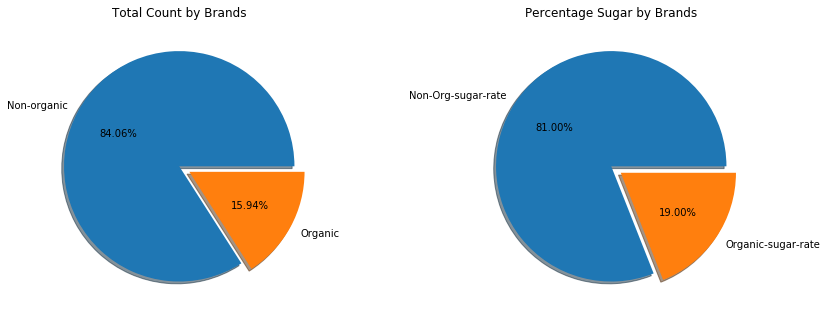

In [305]:
fig = plt.figure()
ax_brand_sugar_cnt = fig.add_axes([0,0,1,1], aspect=1)
ax_brand_sugar_cnt.pie(df_brand_org5[['Non-organic-count', 'Organic-count']].sum(), labels=['Non-organic','Organic'], \
                   shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_brand_sugar_cnt.set_title('Total Count by Brands')


ax_brand_sugar_pcnt = fig.add_axes([1,0,1,1], aspect=1)
ax_brand_sugar_pcnt.pie(df_bands_sugar[['N-sugar-pcnt','O-sugar-pcnt']].sum(), labels=['Non-Org-sugar-rate', 'Organic-sugar-rate'], \
                   shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_brand_sugar_pcnt.set_title('Percentage Sugar by Brands')
plt.show()

In [289]:
df_brand_set = pd.merge(df_brand_org5, df_bands_sugar, left_index = True, right_index = True)
print(df_brand_set.shape)
df_brand_set.head()

(23, 8)


,Non-organic-count,Organic-count,Non-Org_pcnt,Organic_pcnt,Non-Org-sugar,Organic-sugar,N-sugar-pcnt,O-sugar-pcnt
brands,,,,,,,,
365 Everyday Value,616,297,0.674699,0.325061,5851.36,2980.07,0.662561,0.337414
Wild Harvest,114,198,0.365385,0.633873,1478.24,1812.87,0.449162,0.550763
O Organics,48,153,0.238806,0.760291,349.16,1595.56,0.179543,0.820382
Meijer,2646,151,0.946014,0.053968,36664.73,1498.87,0.960725,0.039274
Simply Balanced,142,149,0.487973,0.511170,2632.84,1381.84,0.655803,0.344141


In [302]:
df_bands_salt = df_100brands[(df_100brands['brands'].isin(df_brand_org5.index))].pivot_table(\
    'salt_100g', index="organic", columns='brands', aggfunc=sum).T
df_bands_salt.columns = ['Non-Org-salt','Organic-salt']
df_bands_salt['Organic-salt'] = df_bands_salt['Organic-salt'].fillna(0.0)
df_bands_salt['N-salt-pcnt'] = df_bands_salt['Non-Org-salt'] / df_bands_salt.sum(axis=1)
df_bands_salt['O-salt-pcnt'] = df_bands_salt['Organic-salt'] / df_bands_salt.sum(axis=1)
print(df_bands_salt.shape)
df_bands_salt

(23, 4)


,Non-Org-salt,Organic-salt,N-salt-pcnt,O-salt-pcnt
brands,,,,
365 Everyday Value,631.16714,240.03254,0.724480,0.275291
Ahold,1436.64940,54.17820,0.963659,0.036318
Amy's,155.46906,32.82188,0.825685,0.173554
Bob's Red Mill,136.90600,3.03276,0.978328,0.021522
Daily Chef,285.49600,10.82040,0.963484,0.036398
Delallo,326.63130,0.50800,0.998447,0.001548
Full Circle,111.49838,79.20990,0.584654,0.414076
Giant,598.05302,24.21128,0.961092,0.038848
Kings,130.40614,6.85038,0.950091,0.049566


In [300]:
df_bands_salt[['Non-Org-salt','Organic-salt']].sum()

Non-Org-salt    12659.0571
Organic-salt     1537.5901
dtype: float64

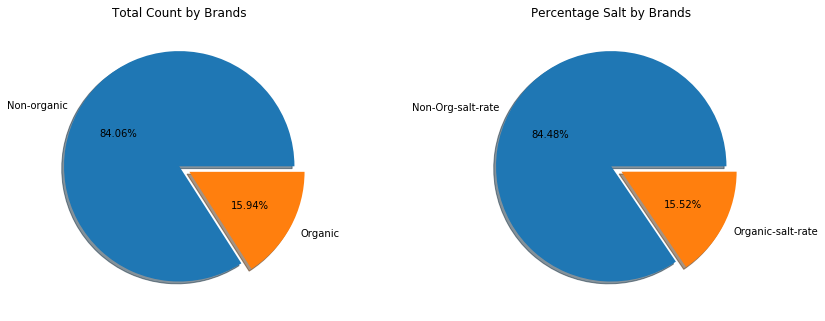

In [303]:
fig = plt.figure()
ax_brand_salt_cnt = fig.add_axes([0,0,1,1], aspect=1)
ax_brand_salt_cnt.pie(df_brand_org5[['Non-organic-count', 'Organic-count']].sum(), labels=['Non-organic','Organic'], \
                   shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_brand_salt_cnt.set_title('Total Count by Brands')


ax_brand_salt_pcnt = fig.add_axes([1,0,1,1], aspect=1)
ax_brand_salt_pcnt.pie(df_bands_salt[['N-salt-pcnt','O-salt-pcnt']].sum(), labels=['Non-Org-salt-rate', 'Organic-salt-rate'], \
                   shadow=True, autopct='%1.2f%%',radius=1,explode=[0,0.1])
ax_brand_salt_pcnt.set_title('Percentage Salt by Brands')
plt.show()

In [291]:
df_brand_set = pd.merge(df_brand_set, df_bands_salt, left_index = True, right_index = True)
print(df_brand_set.shape)
df_brand_set.head()

(23, 12)


,Non-organic-count,Organic-count,Non-Org_pcnt,Organic_pcnt,Non-Org-sugar,Organic-sugar,N-sugar-pcnt,O-sugar-pcnt,Non-Org-salt,Organic-salt,N-salt-pcnt,O-salt-pcnt
brands,,,,,,,,,,,,
365 Everyday Value,616,297,0.674699,0.325061,5851.36,2980.07,0.662561,0.337414,631.16714,240.03254,0.724480,0.275291
Wild Harvest,114,198,0.365385,0.633873,1478.24,1812.87,0.449162,0.550763,104.64292,168.36898,0.383291,0.615845
O Organics,48,153,0.238806,0.760291,349.16,1595.56,0.179543,0.820382,84.86394,125.08738,0.404208,0.594647
Meijer,2646,151,0.946014,0.053968,36664.73,1498.87,0.960725,0.039274,3676.70102,77.98054,0.979231,0.020763
Simply Balanced,142,149,0.487973,0.511170,2632.84,1381.84,0.655803,0.344141,93.37040,74.21372,0.557155,0.441377


In [292]:
df_grp_organic.total_sugar_portion

Non-organic    0.959145
organic        0.040855
Name: total_sugar_portion, dtype: float64